In [7]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.optimizers import SGD

In [2]:
train_generator = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.2,
                              rescale=1/255)
test_generator = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.2,
                              rescale=1/255)

In [3]:
train_gen = train_generator.flow_from_directory('../input/dogs-cats-images/dataset/training_set/')

Found 8000 images belonging to 2 classes.


In [4]:
test_gen = test_generator.flow_from_directory('../input/dogs-cats-images/dataset/test_set/')

Found 2000 images belonging to 2 classes.


In [5]:
x_train, y_train = next(train_gen)

In [16]:
model = Sequential([
    Conv2D(64,(3,3), input_shape=(256,256,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x_train[0].reshape(1,256,256,3), y_train[0].reshape(1,2))

Epoch 1/1
1/1 [==============================] - 0s 286ms/step - loss: 0.6833 - accuracy: 0.5000


In [34]:
model.fit_generator(generator=train_gen, samples_per_epoch=2000, validation_data=test_gen, epochs=50)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras.pre..., validation_data=<keras.pre..., epochs=50, steps_per_epoch=62)`
  """Entry point for launching an IPython kernel.


Epoch 1/50
62/62 [==============================] - 64s 1s/step - loss: 0.4492 - accuracy: 0.7888 - val_loss: 0.5584 - val_accuracy: 0.7788
Epoch 2/50
62/62 [==============================] - 59s 947ms/step - loss: 0.4224 - accuracy: 0.7961 - val_loss: 0.7456 - val_accuracy: 0.7890
Epoch 3/50
62/62 [==============================] - 60s 960ms/step - loss: 0.4273 - accuracy: 0.8029 - val_loss: 0.5402 - val_accuracy: 0.7980
Epoch 4/50
62/62 [==============================] - 56s 899ms/step - loss: 0.4168 - accuracy: 0.8067 - val_loss: 0.2962 - val_accuracy: 0.7725
Epoch 5/50
62/62 [==============================] - 64s 1s/step - loss: 0.4041 - accuracy: 0.8125 - val_loss: 0.3267 - val_accuracy: 0.7835
Epoch 6/50
62/62 [==============================] - 59s 958ms/step - loss: 0.4374 - accuracy: 0.7911 - val_loss: 0.5438 - val_accuracy: 0.7945
Epoch 7/50
62/62 [==============================] - 59s 960ms/step - loss: 0.4274 - accuracy: 0.8122 - val_loss: 0.5086 - val_accuracy: 0.8033
Epoch

In [35]:
import cv2
from skimage import io

In [36]:
import matplotlib.pyplot as plt

In [37]:
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Domestic_cat.jpg/1024px-Domestic_cat.jpg')

In [38]:
img.shape

(761, 1024, 3)

In [39]:
img = cv2.resize(img, (256,256))

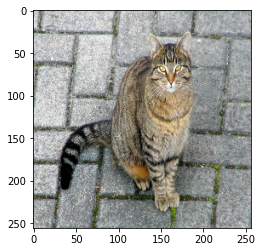

In [58]:
plt.imshow(img)
img = img / 255

In [59]:
pred = model.predict(img.reshape(1,256,256,3))

In [60]:
pred

array([[0.594437  , 0.46885502]], dtype=float32)

In [61]:
if(np.argmax(pred) == 0):
    print("Cat")
else:
    print("Dog")

Cat


[1. 0.]


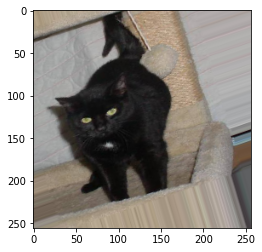

In [43]:
x_test, y_test = next(test_gen)
plt.imshow(x_test[0])
print(y_test[0])

In [44]:
import joblib

In [48]:
joblib.dump(model, 'dogs-vs-cat 0.8257.pkl')

['dogs-vs-cat 0.8257.pkl']

In [64]:
def predict(url):
    img = io.imread(url)
    img = cv2.resize(img, (256,256))
    img = img/255
    plt.imshow(img)
    pred = model.predict(img.reshape(1,256,256,3))
    if(np.argmax(pred) == 0):
        print("Prediction : Cat","Confidence: {}%".format(round(pred[0][0]*100,2)))
    else:
        print("Prediction : Dog", "Confidence: {}%".format(round(pred[0][1]*100,2)))

Prediction : Cat Confidence: 92.15%


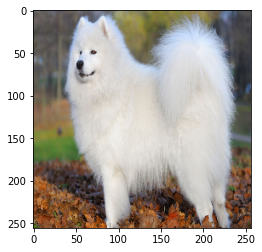

In [67]:
predict('http://hips.hearstapps.com/ghk.h-cdn.co/assets/17/30/2560x1280/landscape-1500925839-golden-retriever-puppy.jpg')